# For single neural


In [1]:
import torch

In [2]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [3]:
torch.manual_seed(7)

features = torch.randn((1,5))

weights = torch.randn_like(features)

bias = torch.randn((1,1))

In [4]:
features.shape

torch.Size([1, 5])

In [5]:
weights.shape

torch.Size([1, 5])

In [6]:
y = torch.sum(features*weights)+bias

In [7]:
y_predict = activation(y)

In [8]:
y_predict

tensor([[0.1595]])

In [9]:
y= activation(torch.matmul(features, weights.view(5,1))+bias)
y

tensor([[0.1595]])

# for two layer


In [10]:
torch.manual_seed(7)

features = torch.randn((1,3))    #three input


#size of the neural network

n_input = features.shape[1]
n_hidden = 2
n_output =1

W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden, n_output)

B1 = torch.randn((1,n_hidden))
B2 = torch.randn((1,n_output))



In [11]:
n_input

3

In [12]:
h = activation(torch.mm(features,W1)+B1)
output = activation(torch.mm(h, W2)+B2)
output

tensor([[0.3171]])

# Neural network for MNIST dataset


In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch


import matplotlib.pyplot as plt

In [14]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [15]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

C:\Users\tanvi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


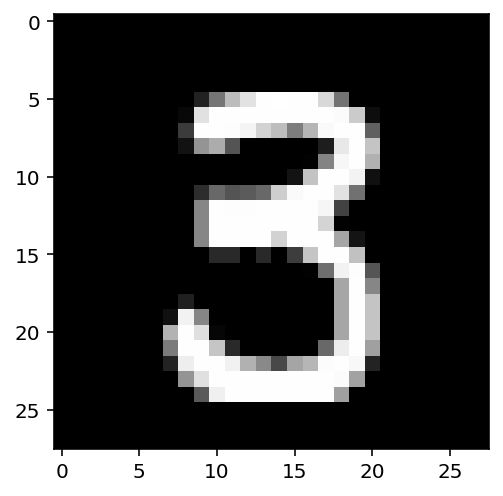

In [17]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [18]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs,w1)+b1)
out = torch.mm(h,w2)+b2

In [19]:
print(out)
out.shape

tensor([[-7.9890e+00, -1.1939e+01, -1.0578e+01, -1.0542e+00, -1.0210e+01,
          9.8305e+00, -7.7808e+00,  7.9509e+00, -1.7184e+00, -2.1894e+01],
        [-2.4237e+00, -9.1932e+00, -1.0821e+01, -6.6993e+00, -1.4961e+01,
          8.5739e+00, -6.8169e+00, -7.2353e+00,  5.5436e+00, -5.2401e+00],
        [-3.8356e+00, -1.6007e+01, -1.1797e+01, -9.1650e+00, -7.2636e+00,
          9.8336e+00, -5.1960e+00, -6.7520e+00, -2.2599e+00, -2.6790e+00],
        [-8.5469e+00, -6.0329e+00, -1.2541e+01,  5.1122e-01, -1.5591e+01,
          8.0434e+00,  2.0398e+00, -4.7205e+00,  2.7735e+00, -1.3874e+01],
        [ 1.4452e+00, -1.7440e+01, -1.5071e+01, -1.4489e+01, -1.4442e+01,
          8.8021e+00, -4.8359e+00, -1.2470e+01,  1.1011e+00, -3.2277e+00],
        [ 8.0568e-01, -1.2427e+01, -1.3655e+01, -1.3899e+01, -1.1145e+01,
          4.5540e+00, -8.6186e-01, -2.8966e+00,  3.5538e+00, -1.2926e+01],
        [-5.8252e+00,  2.4327e+00, -7.0337e+00, -5.9457e+00, -1.7335e+01,
          1.4394e+01,  7.0891e+0

torch.Size([64, 10])

In [20]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

probabilities = softmax(out)

print(probabilities.shape)

print(probabilities.sum(dim=1))


torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Building Network with Pytorch

In [21]:
from torch import nn

In [22]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self,x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [23]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

# Also can build with the built-in functional F

In [24]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x),dim=1)
        
        return x

# Build for (input layer =784, hidn lay= 128, hidn lay= 64, output lay=10)

In [25]:
class MultiNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x))
       
        return x    

In [26]:
model2 = MultiNetwork()
model2

MultiNetwork(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

# Can modify automatic weight and bias

In [27]:
print(model2.hidden.weight)

Parameter containing:
tensor([[ 0.0303,  0.0047, -0.0060,  ...,  0.0235,  0.0012, -0.0335],
        [ 0.0141,  0.0220,  0.0141,  ..., -0.0081,  0.0335, -0.0211],
        [-0.0301, -0.0065,  0.0150,  ...,  0.0091, -0.0224, -0.0060],
        ...,
        [ 0.0126,  0.0191,  0.0257,  ..., -0.0219,  0.0255, -0.0272],
        [ 0.0334, -0.0019, -0.0155,  ..., -0.0205,  0.0314, -0.0051],
        [-0.0152,  0.0289,  0.0296,  ..., -0.0032,  0.0309,  0.0017]],
       requires_grad=True)


In [28]:
model2.hidden.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
model2.hidden.weight.data.normal_(std=0.01)

tensor([[ 0.0044,  0.0075, -0.0091,  ..., -0.0029, -0.0191, -0.0109],
        [-0.0039,  0.0115,  0.0018,  ...,  0.0032, -0.0116,  0.0238],
        [ 0.0001, -0.0048, -0.0022,  ..., -0.0073,  0.0073, -0.0150],
        ...,
        [ 0.0003, -0.0006,  0.0089,  ..., -0.0065,  0.0105, -0.0093],
        [ 0.0069, -0.0074,  0.0049,  ..., -0.0027,  0.0132,  0.0289],
        [ 0.0017,  0.0128, -0.0048,  ..., -0.0103, -0.0042, -0.0028]])

In [30]:
import helper

# Forward pass

In [31]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

img_idx=0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1,28,28), ps)


AttributeError: module 'helper' has no attribute 'view_classify'

# Building Network using nn sequential

In [35]:
#pytorch provides a convenient way to build networks with nn sequential

input_size = 784
hidden_sizes = [128,64]
output_size =10
#build a feed forward network
model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [36]:
#forward pass throgh the nn.sequential
images, labels = next(iter(trainloader))
images.resize_(images.shape[0],1,784)
ps = model.forward(images[0,:])


In [34]:
#can also pass in an OrderedDict to name the individual layers and operations, instead of incremental integer
from collections import OrderDict
model = nn.Sequential(OrderDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('fc2',nn.Linear(hidden_sizes[0],hidden_sizes[1])),
    ('relu2',nn.ReLU()),
    ('output',nn.Linear(hidden_sizes[1],output_sizes)),
    ('softmax',nn.Softmax(dim=1))]))
model

ImportError: cannot import name 'OrderDict' from 'collections' (C:\Users\tanvi\anaconda3\lib\collections\__init__.py)

# Losses in Pytorch

In [37]:
#load the previous data which we import above in this notebook
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
#build the model
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10))

#define loss
criterion = nn.CrossEntropyLoss()

#forward pass
logits = model(images)

loss = criterion(logits,labels)

print(loss)



tensor(2.3049, grad_fn=<NllLossBackward>)


In [38]:
#build a model with logsoftmax which will help to see the probabilities

model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

logps = model(images)

loss = criterion(logps,labels)

print(loss)

tensor(2.3067, grad_fn=<NllLossBackward>)


# Autograd

In [39]:
#demo
x = torch.randn(2,2,requires_grad=True)
print(x)

tensor([[ 0.2293,  2.4529],
        [ 0.0933, -0.4387]], requires_grad=True)


In [40]:
y=x**2
print(y)

tensor([[0.0526, 6.0166],
        [0.0087, 0.1924]], grad_fn=<PowBackward0>)


In [41]:
print(y.grad_fn)

In [42]:
z = y.mean()

In [43]:
print(z)

tensor(1.5676, grad_fn=<MeanBackward0>)


In [44]:
print(x.grad)
#it will show nothing bcz at first z need to be backwarded

None


In [45]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.1147,  1.2264],
        [ 0.0467, -0.2193]])
tensor([[ 0.1147,  1.2264],
        [ 0.0467, -0.2193]], grad_fn=<DivBackward0>)


# Loss and Autograd Together

In [46]:
#build the model
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [47]:
print(loss)

tensor(2.3022, grad_fn=<NllLossBackward>)


In [48]:
print("before backward pass: ",model[0].weight.grad)

loss.backward()

print("After backward pass: ",model[0].weight.grad)

before backward pass:  None
After backward pass:  tensor([[-1.9892e-03, -1.9892e-03, -1.9892e-03,  ..., -1.9892e-03,
         -1.9892e-03, -1.9892e-03],
        [-6.8078e-04, -6.8078e-04, -6.8078e-04,  ..., -6.8078e-04,
         -6.8078e-04, -6.8078e-04],
        [-6.6374e-04, -6.6374e-04, -6.6374e-04,  ..., -6.6374e-04,
         -6.6374e-04, -6.6374e-04],
        ...,
        [-4.6435e-05, -4.6435e-05, -4.6435e-05,  ..., -4.6435e-05,
         -4.6435e-05, -4.6435e-05],
        [ 1.3293e-03,  1.3293e-03,  1.3293e-03,  ...,  1.3293e-03,
          1.3293e-03,  1.3293e-03],
        [ 1.9104e-04,  1.9104e-04,  1.9104e-04,  ...,  1.9104e-04,
          1.9104e-04,  1.9104e-04]])


# Training the model

In [50]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [51]:
print("initial weights",model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64,784)

optimizer.zero_grad()  #for clear the previous gradients bcz gradients are accumulated

output = model(images)
loss = criterion(output,labels)
loss.backward()
print("Gradient: ",model[0].weight.grad)  

initial weights Parameter containing:
tensor([[-0.0116,  0.0146, -0.0287,  ..., -0.0137, -0.0170, -0.0054],
        [ 0.0355,  0.0289, -0.0281,  ...,  0.0287,  0.0332,  0.0236],
        [ 0.0335, -0.0271,  0.0340,  ..., -0.0301,  0.0302,  0.0313],
        ...,
        [ 0.0200, -0.0134,  0.0117,  ...,  0.0066, -0.0149, -0.0120],
        [-0.0319,  0.0342,  0.0043,  ..., -0.0166,  0.0029, -0.0165],
        [ 0.0201,  0.0354, -0.0146,  ...,  0.0106,  0.0175,  0.0113]],
       requires_grad=True)
Gradient:  tensor([[-3.4569e-04, -3.4569e-04, -3.4569e-04,  ..., -3.4569e-04,
         -3.4569e-04, -3.4569e-04],
        [ 2.1020e-04,  2.1020e-04,  2.1020e-04,  ...,  2.1020e-04,
          2.1020e-04,  2.1020e-04],
        [-7.5800e-03, -7.5800e-03, -7.5800e-03,  ..., -7.5800e-03,
         -7.5800e-03, -7.5800e-03],
        ...,
        [-1.2234e-03, -1.2234e-03, -1.2234e-03,  ..., -1.2234e-03,
         -1.2234e-03, -1.2234e-03],
        [-1.7483e-05, -1.7483e-05, -1.7483e-05,  ..., -1.7483e-05

In [54]:
optimizer.step()
print("new weights: ",model[0].weight)

new weights:  Parameter containing:
tensor([[-0.0116,  0.0146, -0.0286,  ..., -0.0137, -0.0170, -0.0054],
        [ 0.0355,  0.0289, -0.0281,  ...,  0.0287,  0.0332,  0.0236],
        [ 0.0336, -0.0270,  0.0341,  ..., -0.0300,  0.0303,  0.0315],
        ...,
        [ 0.0201, -0.0134,  0.0117,  ...,  0.0066, -0.0149, -0.0120],
        [-0.0319,  0.0342,  0.0043,  ..., -0.0166,  0.0029, -0.0165],
        [ 0.0201,  0.0354, -0.0146,  ...,  0.0106,  0.0175,  0.0113]],
       requires_grad=True)


# Training for real

In [58]:
model = nn.Sequential(nn.Linear(784,128),
                nn.ReLU(),
                nn.Linear(128,64),
                nn.ReLU(),
                nn.Linear(64,10),
                nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

epoches=5

for i in range(epoches):
    running_loss = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss +=loss.item()
        
    else:
        print(f"training loss: {running_loss/len(trainloader)}")


training loss: 2.232021545550462
training loss: 1.9868649396815026
training loss: 1.5400091581253101
training loss: 1.0887737539785503
training loss: 0.8148590095007597


In [63]:
#to solve the helper package problem , i copy and past the code of view_classify
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

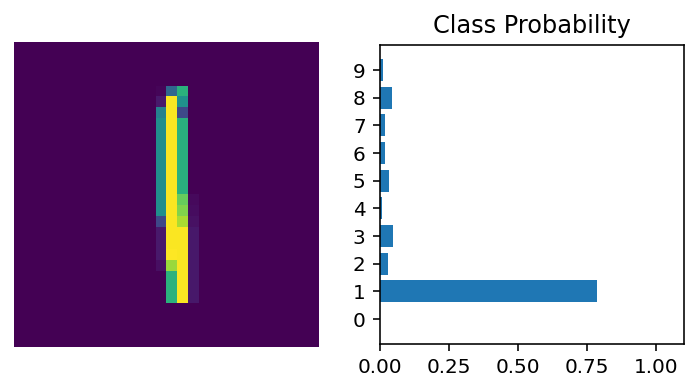

In [62]:
# for show the probability
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1,784)

#turn off the gradients to speed up
with torch.no_grad():
    logps = model(img)
    
ps = torch.exp(logps)
view_classify(img.view(1,28,28), ps)